<a href="https://colab.research.google.com/github/mrinmoyeedeka/Retail-Sales-Prediction-Regression/blob/main/Regression_Capstone_Project__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Title :** Retail Sales Prediction : Predicting sales of a major store chain Rossmann

**Project Type - Regression**


## **Problem Description:**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

We are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set.We should Note that some stores in the dataset were temporarily closed for refurbishment.


## **Data Description:**

Rossmann Stores Data.csv - historical data including Sales

store.csv - supplemental information about the stores

## **Data fields:**

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

*   Id - an Id that represents a (Store, Date) duple within the test set
*   Store - a unique Id for each store.
*   Sales - the turnover for any given day (this is what you are predicting)
*   Customers - the number of customers on a given day
*   Open - an indicator for whether the store was open: 0 = closed, 1 = open
*   StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
*   SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
*   StoreType - differentiates between 4 different store models: a, b, c, d
*   Assortment - describes an assortment level: a = basic, b = extra, c = extended
*   CompetitionDistance - distance in meters to the nearest competitor stor
*   CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
*   Promo - indicates whether a store is running a promo on that day
*   Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
*  Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
*   PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store













## **Importing Libraries and Defining Functions**

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

In [ ]:
# Mounting CSV files from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Creating data files path and reading the csv files
rossmann_df = pd.read_csv(r"/content/Rossmann Stores Data.csv")
store_df = pd.read_csv(r"/content/store.csv")

<ipython-input-4-a38801505d6d>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossmann_df = pd.read_csv(r"/content/Rossmann Stores Data.csv")


In [ ]:
# Exploring the rossmann Dataframe
rossmann_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
# Exploring the store Dataframe
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
#Lets take a quick run through the shape of rossmann dataframe and strore dataframe
rossmann_df.shape

(1017209, 9)

In [ ]:
store_df.shape

(1115, 10)

In [ ]:
## Extracting first five rows of rossmann dataset
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
## Extracting last five rows of rossmann dataset
rossmann_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
## Extracting first five rows of store dataset
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
## Extracting last five rows of store dataset
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
# Obtaining the Attributes from the columns of rossmann dataframe and store dataframe
rossmann_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:

store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

 **Data cleaning for missing values and re-creating the dataset**
 
 **Check for the null values in the rossmann dataset**

In [ ]:
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
rossmann_df.isnull()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1017204,False,False,False,False,False,False,False,False,False
1017205,False,False,False,False,False,False,False,False,False
1017206,False,False,False,False,False,False,False,False,False
1017207,False,False,False,False,False,False,False,False,False


**We can see that there are null values in the the rossmann dataset below**

In [ ]:
rossmann_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

**Now we will check for the null values in the store dataset**

In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
store_df.isnull()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...
1110,False,False,False,False,False,False,False,False,False,False
1111,False,False,False,False,False,False,False,True,True,True
1112,False,False,False,False,True,True,False,True,True,True
1113,False,False,False,False,True,True,False,True,True,True


**We can see here that there are many null values in the store dataset.Lets clean this data below.**


In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
## We have replaced the NaN values with 0 in each and every columns where there is null value.
store_df['CompetitionOpenSinceMonth'].fillna('0',inplace=True)
store_df['CompetitionOpenSinceYear'].fillna('0',inplace=True)
store_df['Promo2SinceWeek'].fillna('0',inplace=True)
store_df['Promo2SinceYear'].fillna('0',inplace=True)
store_df['PromoInterval'].fillna('0',inplace=True)

In [ ]:
## Right now there are no null values in the dataset.
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          3
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0,0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0,0,0
4,5,a,a,29910.0,4.0,2015.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0,0,0
1112,1113,a,c,9260.0,0,0,0,0,0,0
1113,1114,a,c,870.0,0,0,0,0,0,0


In [ ]:
store_df.describe()

,Store,CompetitionDistance,Promo2
count,1115.00000,1112.000000,1115.000000
mean,558.00000,5404.901079,0.512108
std,322.01708,7663.174720,0.500078
min,1.00000,20.000000,0.000000
25%,279.50000,717.500000,0.000000
50%,558.00000,2325.000000,1.000000
75%,836.50000,6882.500000,1.000000
max,1115.00000,75860.000000,1.000000


###**Exploratory Data Analysis**

<ipython-input-27-4e55307f8468>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_df['CompetitionDistance'])


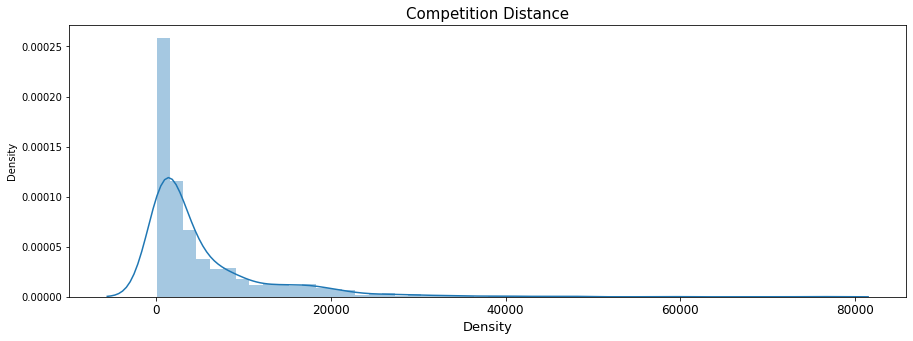

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.distplot(store_df['CompetitionDistance'])

ax.set_title('Competition Distance', fontsize = 15, loc='center')
ax.set_xlabel('Density', fontsize = 13)
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left()

**The distribution is right skewed, so we'll replace missing values with the median.**

In [ ]:
# replace missing values in CompetitionDistance with median for the store dataset

store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)

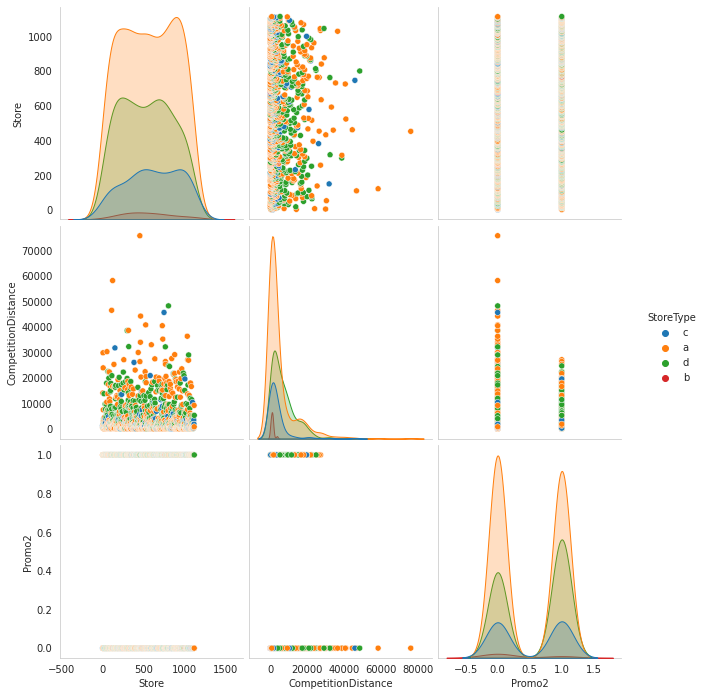

In [ ]:
#pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_df,hue='StoreType')
pp.fig.set_size_inches(10,10);

## **Merging both datasets i.e rossmann and store in one dataset** 

In [ ]:
final_df = pd.merge(rossmann_df, store_df, how='left', on='Store')
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0,0,0


**Remove features with high percentages of missing values**

**we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values** 

In [ ]:
final_df = final_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear', 'PromoInterval'], axis=1)

In [ ]:
## Below is the final dataset where we can work on now.
final_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0


In [ ]:
final_df.duplicated(subset=None, keep='first')

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool

In [ ]:
duplicates = final_df.duplicated()
print(duplicates)

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool


In [ ]:
final_df.shape

(1017209, 13)

**Distribution Of Different Store Types**

In [ ]:
store_type = final_df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

<ipython-input-36-7286400dc4df>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store_type = final_df.groupby("StoreType")["Sales","Customers"].sum().reset_index()


,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


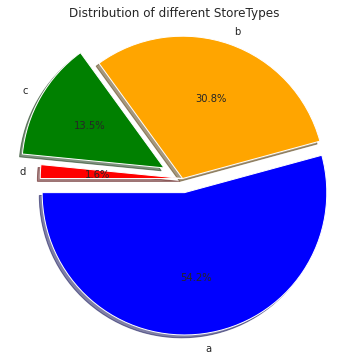

In [ ]:
# Percentage of Distribution of different store type
labels = 'a' , 'b' , 'c' , 'd'
sizes = final_df.StoreType.value_counts()
colors = ['blue', 'orange' , 'green' , 'red']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

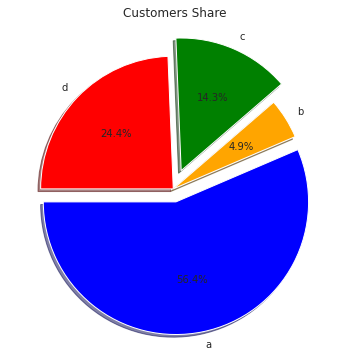

In [ ]:
# Percentage of customer share in different store type
labels = ['a', 'b', 'c', 'd']
sizes = final_df.groupby("StoreType")["Customers"].sum()
colors = ['blue', 'orange', 'green', 'red']
explode = (0.1, 0.0, 0.15, 0.0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Customers Share")
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


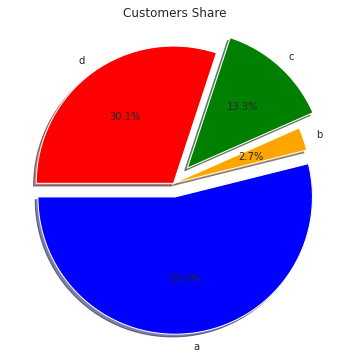

In [ ]:
# Percentage of customer share in sales
labels = ['a', 'b', 'c', 'd']
sizes = final_df.groupby("StoreType")["Sales"].sum()
colors = ['blue', 'orange', 'green', 'red']
explode = (0.1, 0.0, 0.15, 0.0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Customers Share")
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

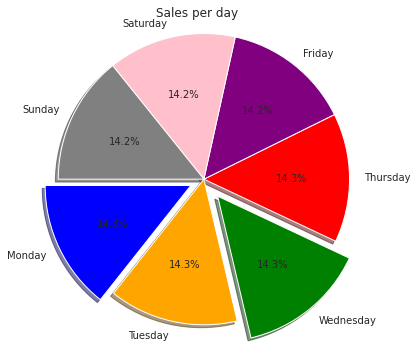

In [ ]:
#Sales per day
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sizes = final_df.DayOfWeek.value_counts()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'pink', 'gray']
explode = (0.1, 0.0, 0.15, 0.0, 0.0, 0.0, 0.0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales per day")
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()


**Upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type "a" stores in our dataset.**

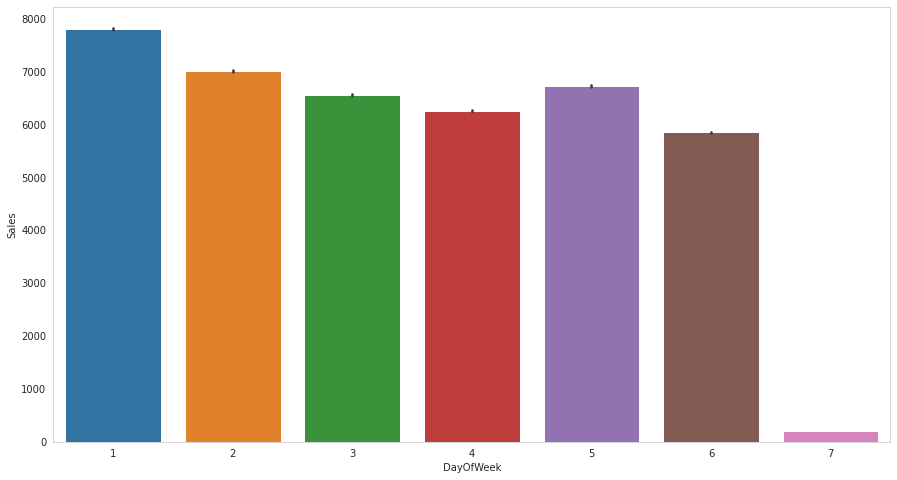

In [ ]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=final_df); 

In [ ]:
##For categorical variables
categorical_variable= ("Store",	"DayOfWeek","Sales",	"Customers",	"Open",	"Promo",	"StateHoliday",	"SchoolHoliday",	"StoreType",	"Assortment","Promo2")

In [ ]:
for col in categorical_variable:
  print(f'unique values for {col}: {final_df[col].unique()}')

unique values for Store: [   1    2    3 ... 1113 1114 1115]
unique values for DayOfWeek: [5 4 3 2 1 7 6]
unique values for Sales: [ 5263  6064  8314 ...   660 17815 23303]
unique values for Customers: [ 555  625  821 ... 3900   36 4065]
unique values for Open: [1 0]
unique values for Promo: [1 0]
unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
unique values for SchoolHoliday: [1 0]
unique values for StoreType: ['c' 'a' 'd' 'b']
unique values for Assortment: ['a' 'c' 'b']
unique values for Promo2: [0 1]


In [ ]:
#change into int type
final_df['StateHoliday'].replace({'0':0}, inplace=True)

In [ ]:
#creating features from the date
final_df['year'] = pd.DatetimeIndex(final_df['Date']).year
final_df['month'] = pd.DatetimeIndex(final_df['Date']).month
final_df['day'] = pd.DatetimeIndex(final_df['Date']).day

In [ ]:
years= final_df['year'].unique()

In [ ]:
years

array([2015, 2014, 2013])

**CONTINUOUS** **FEATURES**

In [ ]:
#sales over the years
sales_df_2013 = final_df[final_df['year']== 2013]
sales_df_2014 = final_df[final_df['year']==2014]
sales_df_2015 = final_df[final_df['year']== 2015]

In [ ]:
#monthly sales
sales_2013 = sales_df_2013.groupby('month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('month')['Sales'].sum().reset_index()

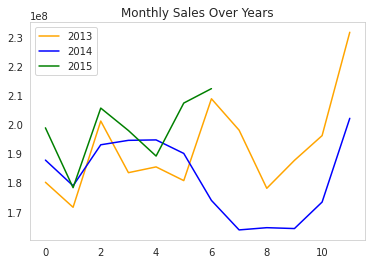

In [ ]:
#plotting
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

**Observation**:
Sales rise up by the end of the year before the holidays. Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.

<Axes: xlabel='Customers', ylabel='Sales'>

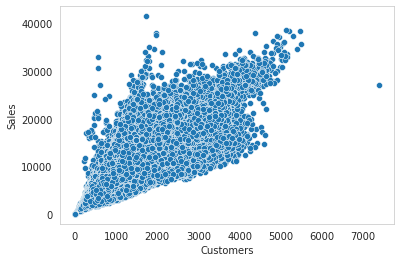

In [ ]:
#scatterplot of Customers and Sales
sns.scatterplot(x=final_df['Customers'], y=final_df['Sales'])

**Observation**:
Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

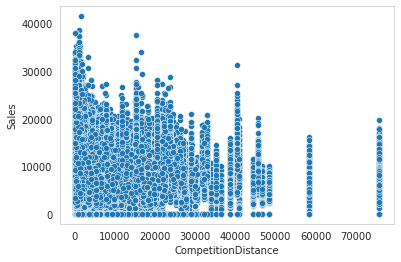

In [ ]:
#scatterplot of Competition Distance and Sales
sns.scatterplot(x=final_df['CompetitionDistance'], y=final_df['Sales'])

**Observation**:
From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

<ipython-input-53-c170ce52d3d0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=final_df['Sales'])


<Axes: ylabel='Density'>

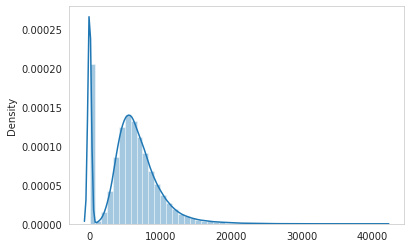

In [ ]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=final_df['Sales'])
     

**Observation**:
The drop in sales indicates the 0 sales accounting to the stores temporarily closed due to refurbishment. This drop was also seen in the Sales over the years plot earlier.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

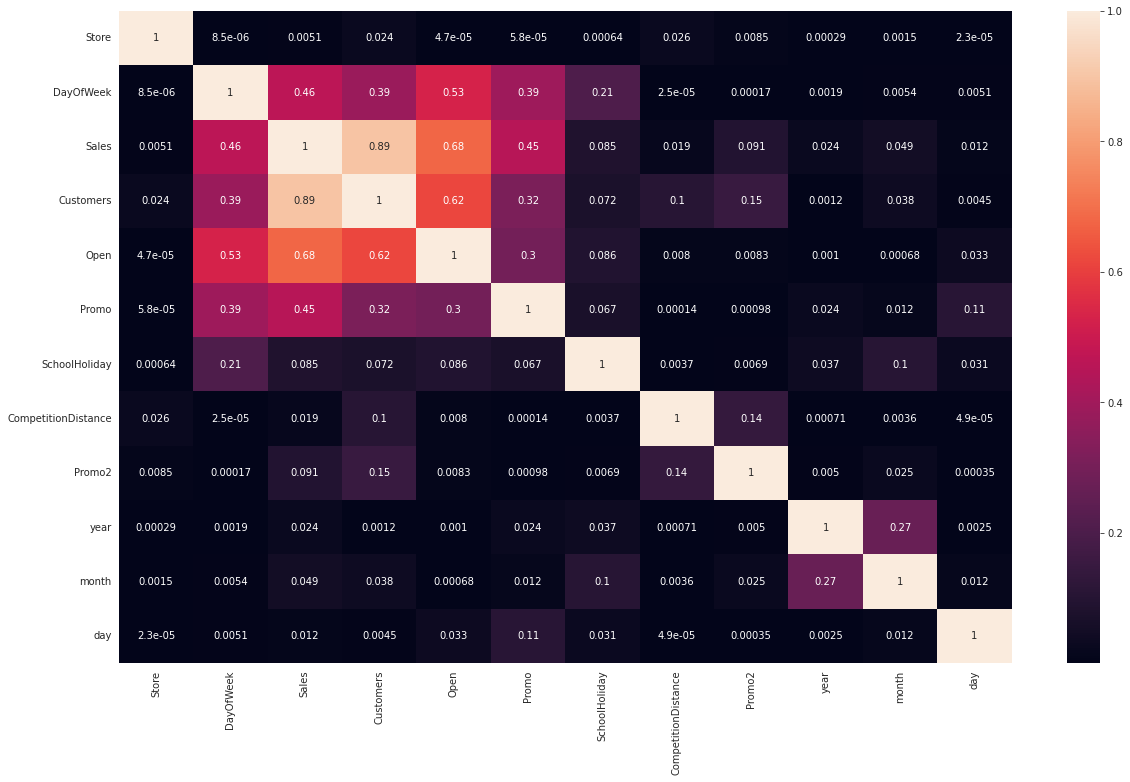

In [ ]:
plt.subplots(figsize=(20,12))
sns.heatmap(final_df.corr().abs(), annot=True)
plt.savefig("heatmap.png")

from google.colab import files
files.download('heatmap.png') # this line opens your documents in your pc to save your png

<Axes: >

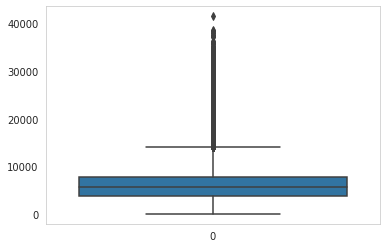

In [ ]:
#checking outliers in sales
sns.boxplot(final_df['Sales'])

In [ ]:
#removing outliers
def remove_outlier(final_df_in, col_name):
    q1 = final_df_in[col_name].quantile(0.25)
    q3 = final_df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    final_df_out = final_df_in.loc[(final_df_in[col_name] > fence_low) & (final_df_in[col_name] < fence_high)]
    return final_df_out

<Axes: >

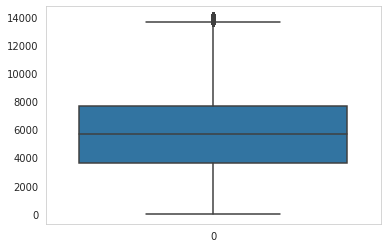

In [ ]:
# defining new variable after removing outliers
final_df= remove_outlier(final_df, 'Sales')
sns.boxplot(final_df['Sales'])

# **Conclusion of the analysis**:
*   Sales are highly correlated to number of Customers.
*   The most selling and crowded store type is A.
*   StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.
*   StoreTybe D had the highest buyer cart.
*   For all stores, Promotion leads to increase in Sales and Customers both.
*   Promo runs only in weekdays.
*   More stores are opened during School holidays than State holidays.
*   The stores which are opened during School Holiday have more sales than normal days.
*   Sales are increased during Chirstmas week, this might be due to the fact that people buy more beauty products during a Christmas celebration.
*   Promo2 doesnt seems to be correlated to any significant change in the sales amount.
*   Absence of values in features CompetitionOpenSinceYear/Month doesn’t indicate the absence of competition as CompetitionDistance values are not null where the other two values are null.



















**Drop Subsets Of Data Where Might Cause Bias**

In [ ]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
final_df = final_df[final_df.Open != 0]

In [ ]:
# Open isn't a variable anymore, so we'll drop it too
final_df = final_df.drop('Open', axis=1)

In [ ]:
# Check if there's any opened store with zero sales
final_df[final_df.Sales == 0]['Store'].sum()

31460

In [ ]:
# see the percentage of open stored with zero sales
final_df[final_df.Sales == 0]['Sales'].sum()/final_df.Sales.sum()

0.0

In [ ]:
# remove this part of data to avoid bias
final_df = final_df[final_df.Sales != 0]

In [ ]:
df_new=final_df.copy()

In [ ]:
df_new = pd.get_dummies(df_new,columns=['StoreType','Assortment'])

In [ ]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,year,month,day,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,0,1,1270.0,0,2015,7,31,0,0,1,0,1,0,0
1,2,5,2015-07-31,6064,625,1,0,1,570.0,1,2015,7,31,1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,0,1,14130.0,1,2015,7,31,1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,0,1,620.0,0,2015,7,31,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,0,1,29910.0,0,2015,7,31,1,0,0,0,1,0,0


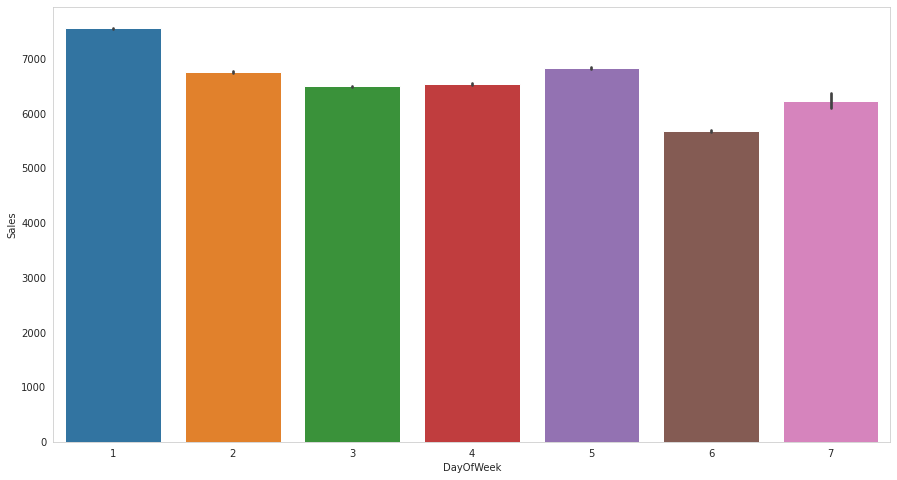

In [ ]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=df_new);

* From plot it can be sen that most of the sales have been on 1st and last day of week.



## **Implementing Supervised Machine Learning algorithms.**

In [ ]:
X = df_new.drop(['Sales','Date','Store','year'] , axis = 1)
y = df_new.Sales

In [ ]:
X.shape

(817644, 16)

In [ ]:
X.head()

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,month,day,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,0,1,1270.0,0,7,31,0,0,1,0,1,0,0
1,5,625,1,0,1,570.0,1,7,31,1,0,0,0,1,0,0
2,5,821,1,0,1,14130.0,1,7,31,1,0,0,0,1,0,0
3,5,1498,1,0,1,620.0,0,7,31,0,0,1,0,0,0,1
4,5,559,1,0,1,29910.0,0,7,31,1,0,0,0,1,0,0


In [ ]:
X.tail()

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,month,day,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1016776,2,566,0,a,1,150.0,0,1,1,0,1,0,0,1,0,0
1016827,2,2377,0,a,1,860.0,0,1,1,0,1,0,0,0,1,0
1016863,2,1248,0,a,1,840.0,1,1,1,0,1,0,0,0,1,0
1017042,2,1039,0,a,1,1430.0,0,1,1,0,1,0,0,0,1,0
1017190,2,1405,0,a,1,720.0,0,1,1,0,1,0,0,0,1,0


In [ ]:
X

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,month,day,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,0,1,1270.0,0,7,31,0,0,1,0,1,0,0
1,5,625,1,0,1,570.0,1,7,31,1,0,0,0,1,0,0
2,5,821,1,0,1,14130.0,1,7,31,1,0,0,0,1,0,0
3,5,1498,1,0,1,620.0,0,7,31,0,0,1,0,0,0,1
4,5,559,1,0,1,29910.0,0,7,31,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,2,566,0,a,1,150.0,0,1,1,0,1,0,0,1,0,0
1016827,2,2377,0,a,1,860.0,0,1,1,0,1,0,0,0,1,0
1016863,2,1248,0,a,1,840.0,1,1,1,0,1,0,0,0,1,0
1017042,2,1039,0,a,1,1430.0,0,1,1,0,1,0,0,0,1,0


In [ ]:
#changing into boolean 
X['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817644 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DayOfWeek            817644 non-null  int64  
 1   Customers            817644 non-null  int64  
 2   Promo                817644 non-null  int64  
 3   StateHoliday         817644 non-null  int64  
 4   SchoolHoliday        817644 non-null  int64  
 5   CompetitionDistance  817644 non-null  float64
 6   Promo2               817644 non-null  int64  
 7   month                817644 non-null  int64  
 8   day                  817644 non-null  int64  
 9   StoreType_a          817644 non-null  uint8  
 10  StoreType_b          817644 non-null  uint8  
 11  StoreType_c          817644 non-null  uint8  
 12  StoreType_d          817644 non-null  uint8  
 13  Assortment_a         817644 non-null  uint8  
 14  Assortment_b         817644 non-null  uint8  
 15  Assortment_c    

In [ ]:
y.head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [ ]:
X.describe()

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,month,day,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
count,817644.000000,817644.000000,817644.000000,817644.000000,817644.000000,817644.000000,817644.000000,817644.000000,817644.000000,817644.000000,817644.000000,817644.000000,817644.000000,817644.000000,817644.000000,817644.000000
mean,3.542267,722.807679,0.437462,0.000941,0.192504,5511.399998,0.506025,5.820357,15.850030,0.538733,0.014992,0.134533,0.311742,0.531395,0.008992,0.459613
std,1.715614,312.087944,0.496074,0.030653,0.394267,7819.717688,0.499964,3.310327,8.655372,0.498498,0.121520,0.341224,0.463205,0.499014,0.094397,0.498367
min,1.000000,8.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,514.000000,0.000000,0.000000,0.000000,730.000000,0.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,665.000000,0.000000,0.000000,0.000000,2380.000000,1.000000,6.000000,16.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,5.000000,866.000000,1.000000,0.000000,0.000000,6910.000000,1.000000,8.000000,23.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,7.000000,4256.000000,1.000000,1.000000,1.000000,75860.000000,1.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Splitting Dataset Into Training Set and Test Set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
columns=X_train.columns

# **Linear Regression (OLS)**

# Standardise the data using minmax scalar or standard scalar

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

-1244556945635009.8

In [ ]:
regressor.coef_

array([-1.29866773e+02,  3.06923610e+04,  1.09165857e+03,  6.23593746e+01,
        2.76490372e+01,  1.82148625e+03,  3.10724480e+02,  2.11118852e+02,
        3.09880968e+01,  3.89399634e+15,  3.89399634e+15,  3.89399634e+15,
        3.89399634e+15, -2.64943940e+15, -2.64943940e+15, -2.64943940e+15])

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

1329628.7591624744

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

1153.095294918193

In [ ]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

0.7807271449496948

In [ ]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

0.7823555358806987

In [ ]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

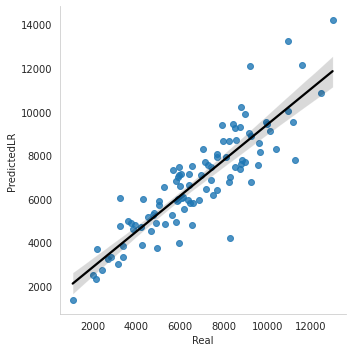

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

In [ ]:
np.asarray(X).dtype

dtype('float64')

# **Inferences On Linear Regression Coefficients**

In [ ]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit()## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 2.085e+05
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:42   Log-Likelihood:            -6.9257e+06
No. Observations:              817644   AIC:                         1.385e+07
Df Residuals:                  817629   BIC:                         1.385e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -988.1705      5.651   -174.882      0.000    -999.245    -977.096
DayOfWeek             -21.2281      0.785    -27.041      0.000     -22.767     -19.689
Customers               7.2258      0.005   1471.767      0.000       7.216       7.235
Promo                1091.3262      2.760    395.338      0.000    1085.916    1096.737
StateHoliday           66.8212     41.879      1.596      0.111     -15.260     148.903
SchoolHoliday          31.7347      3.297      9.626      0.000      25.273      38.196
CompetitionDistance     0.0240      0.000    140.463      0.000       0.024       0.024
Promo2                307.7800      2.662    115.629      0.000     302.563     312.997
month                  18.9871      0.389     48.791      0.000      18.224      19.750
day                     0.9770      0.149      6.561      0.000       0.685       1.269
StoreType_a            68.2335      4.784     14.263      0.000      58.857      77.610
StoreType_b         -2140.7968     12.760   -167.771      0.000   -2165.807   -2115.787
StoreType_c           -80.2980      5.317    -15.103      0.000     -90.719     -69.877
StoreType_d          1164.6908      5.028    231.623      0.000    1154.835    1174.546
Assortment_a         1116.2386      6.455    172.932      0.000    1103.587    1128.890
Assortment_b        -3508.7703     15.385   -228.068      0.000   -3538.924   -3478.617
Assortment_c         1404.3612      6.641    211.470      0.000    1391.345    1417.377
==============================================================================
Omnibus:                    49059.495   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145222.779
Skew:                           0.301   Prob(JB):                         0.00
Kurtosis:                       4.975   Cond. No.                     3.77e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.28e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# **Decision Tree Regression**

In [ ]:
#Fit the model in Decision tree
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

In [ ]:
# definte RMSE function
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100
    
train_score_2=treereg.score(X_train, y_train)
test_score_2=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_2 , "," ,
      "Test Score" ,":" , test_score_2)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9999957301266714 , Test Score : 0.9156347349946943
Training RMSE : 5.097176662035323 Testing RMSE : 717.9153264493376
Training MAPE : 0.0010365300881590655 Testing MAPE : 7.644628014646976


In [ ]:
#Shape of Training and testing dataset
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(572350, 16) (245294, 16) (572350,) (245294,)


0.9156347349946943

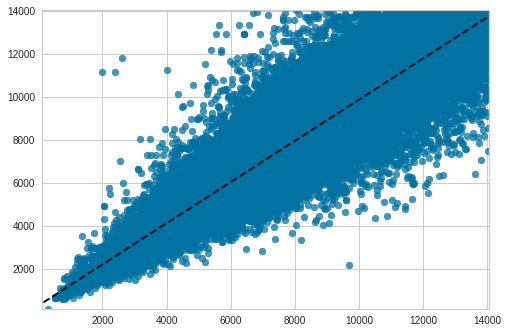

In [ ]:
#Prediction error
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(treereg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

# **Decision Tree With Hyper Parameter Tuning**

In [ ]:
# params = {
#          'min_samples_split':[2,3,5,7],
#          'min_samples_leaf':[6,8,10],
#          }

# grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)
# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.

# grid.fit(X_train, y_train)
# grid.best_params_
# Traind the model with different hyperparameters and and below is the best hyperparameter we have come out.

In [ ]:
tree = DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
treereg = tree.fit(X_train, y_train)

In [ ]:
train_score_3=treereg.score(X_train, y_train)
test_score_3=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_3 , "," ,
      "Test Score" ,":" , test_score_3)

y_predicted_3 = treereg.predict(X_train)
y_test_predicted_3 = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9631420165980544 , Test Score : 0.9355055511913584
Training RMSE : 473.5741357751454 Testing RMSE : 627.7006165155389
Training MAPE : 5.054371269793933 Testing MAPE : 6.66955927562617


In [ ]:
#storing 100 observations for analysis
dc_pred = y_test_predicted_3[:100]
dc_real = y_test[:100]
dataset_dc = pd.DataFrame({'Real':dc_real,'PredictedDC':dc_pred}) #storing these values into dataframe

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_dc['diff']=(dataset_dc['Real']-dataset_dc['PredictedDC']).abs()

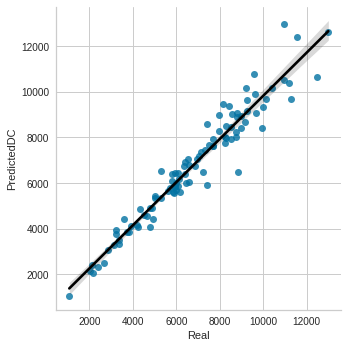

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedDC', data=dataset_dc, line_kws={'color': 'black'});

# **Random Forest With Hyper Parameter Tuning**

In [ ]:
# rfr=RandomForestRegressor(n_jobs=-1)

# params = {
#          'n_estimators':[40,50,60,70,80,90],
#          'min_samples_split':[2,3,6,8],
#          'min_samples_leaf':[1,2,3,4],
#          'max_depth':[None,5,15,30]
#          }

# #the dimensionality is high, the number of combinations we have to search is enormous, using RandomizedSearchCV is a better option then GridSearchCV
# grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)

# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.
# grid.fit(X_train, y_train)
# grid.best_params_

# Trained the model with different hyperparameters and below is the best hyperparameter we have come out with.

In [ ]:
#%%time
rdf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg = rdf.fit(X_train, y_train)

In [ ]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100

train_score_4=rdfreg.score(X_train, y_train)
test_score_4=rdfreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_4 , "," ,
      "Test Score" ,":" , test_score_4)   

y_predicted_4 = rdfreg.predict(X_train)
y_test_predicted_4 = rdfreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted_4),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted_4))
print("Training MAPE", ":", mape(y_train, y_predicted_4),
      "Testing MAPE", ":", mape(y_test, y_test_predicted_4))

Regresion Model Score : 0.9938180545080865 , Test Score : 0.9566785111254376
Training RMSE : 193.94776355827332 Testing RMSE : 514.4498850233942
Training MAPE : 2.1073528592611264 Testing MAPE : 5.6458938340449265


In [ ]:
y_test_predicted_4

array([8316.9   , 6115.4   , 8379.0375, ..., 6533.5625, 6186.6125,
       4529.5   ])

In [ ]:
#storing 100 observations for analysis
rf_prd = y_test_predicted_4[:100]
rf_real = y_test[:100]
dataset_rf = pd.DataFrame({'Real':rf_real,'PredictedRF':rf_prd})

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_rf['diff']=(dataset_rf['Real']-dataset_rf['PredictedRF']).abs()

In [ ]:
 # taking 4 sample
dataset_rf.sample(4)

,Real,PredictedRF,diff
1013343,3132,3139.7750,7.7750
640736,7056,7271.8375,215.8375
801095,3380,3308.9375,71.0625
65224,6396,6321.9750,74.0250


In [ ]:
#Statistical description of our predictions and actual values 
dataset_rf.describe()

,Real,PredictedRF,diff
count,100.000000,100.00000,100.000000
mean,6775.070000,6727.30275,369.085500
std,2534.335345,2438.91926,350.231106
min,1072.000000,1099.51250,7.775000
25%,5004.750000,5257.59375,120.940625
50%,6548.000000,6437.23125,288.687500
75%,8598.250000,8412.31250,489.546875
max,13001.000000,12561.85000,1822.562500


<ipython-input-139-0232307885da>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


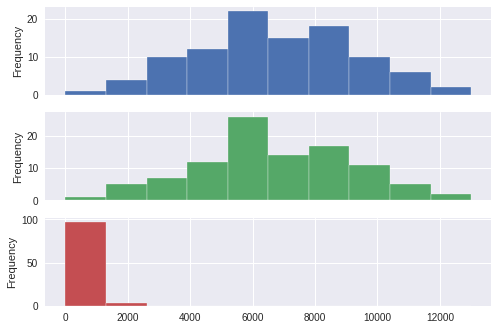

In [ ]:
#plotting the actual,predicted & difference of SALES
plt.style.use('seaborn')
dataset_rf.plot.hist(subplots=True, legend=False);

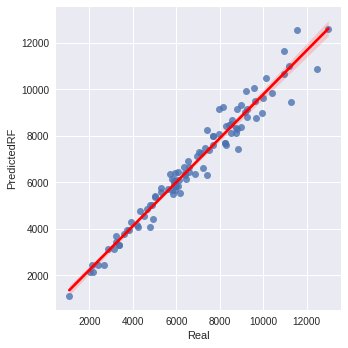

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedRF', data=dataset_rf, line_kws={'color': 'red'}, aspect=1);

# **Feature Importance On Random Forest Regressor**

**As we can see that Random Forest has the highest test score**

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

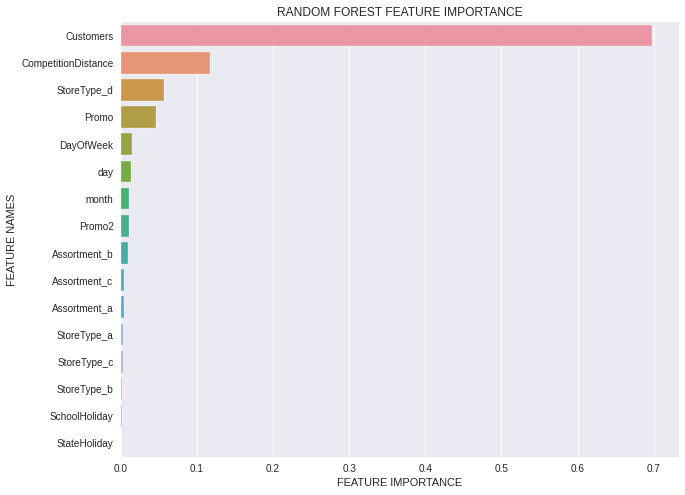

In [ ]:
plot_feature_importance(rdfreg.feature_importances_,columns[:],'RANDOM FOREST')

In [ ]:
score_df = pd.DataFrame({'Train_Score':[train_score_1,train_score_2,train_score_3,train_score_4],'Test_Score':[test_score_1,test_score_2,test_score_3,test_score_4]}, index=['Linear Regression','Decision Tree',"Decision Tree(hyperparameters)",'Random Forest Regression'])

In [ ]:
score_df

,Train_Score,Test_Score
Linear Regression,0.780727,0.782356
Decision Tree,0.999996,0.915635
Decision Tree(hyperparameters),0.963142,0.935506
Random Forest Regression,0.993818,0.956679


# **CONCLUSION:**
* Random Forest Regressor results were much better than our baseline model. Next we'll try to tune the hyperparameters and check the results.
* Most of the sales was seen on Moday as Sunday all the stores remain close and from Monday it starts reopening.

* Promotions helped the stores in increase in there sales.
* Most of the stores should encourage promotions in order to hike there sales.
* Store B should increase in numbers for more sales

* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away probably indicating competition in busy locations vs remote locations.
* The MAPE of Random Forest Regressor was the lowest and seems to be the highest accurate model.

* Random Forest Tuned Model gave the best results and only 0.021% improvement was seen from the basic random forest model which indicates that all the trends and patterns that could be captured by these models without overfitting were done and maximum level of performance achievable by the model was achieved.



